<h1 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Predicting Stroke With Machine Learning</h1>

<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Introduction](#1)
    * [1.1 Problem Statement](#1.1)
    * [1.2 Questions we want to answer](#1.2)
    * [1.3 Libraries](#1.3)
* [2. Data Preprocessing/EDA](#2)
    * [2.1 Data Loading](#2.1)
    * [2.2 Data Cleaning and Imputation](#2.2)
    * [2.3 Visualizations](#2.3)
    * [2.4 Encoding](#2.4)
    * [2.5 Train Test Split](#2.5)
    * [2.6 Scaling](#2.6)
    * [2.7 Feature Selection](#2.7)
* [3. Cross-Validation with Manual Upsampling](#3)
    * [3.1 Models Without Hyperparameter Tuning](#3.1)
    * [3.2 Summary Table of Performance](#3.2)
    * [3.3 Hyperparameter Tuning](#3.3)
    * [3.4 Summary and Rationale for Chosen Model](#3.4)
    * [3.5 Applying SMOTE for Training Final Model](#3.5)
* [4. Final Model](#4)
    * [4.1 Model for Highest Accuracy](#4.1)
    * [4.2 Models for Highest Recall](#4.2)
* [5. Summary](#5)

<a id = '1'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Introduction</h1>

Every year, about 800,000 people in the United States have a stroke, and about 75% of these are first time strokes. In this notebook, will use visualizations to explore the relationships between stroke and various health and sociodemographic indicators and to use these indicators to build a machine learning model that can predict whether or not someone as at risk for stroke. 

<a id = '1.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Problem Statement</h3>

To visualize the relationships between various health and sociodemographic indicators and stroke, and to build a model that predicts whether or not someone is at risk for stroke.

<a id = '1.2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Extra Questions We Want to Explore</h3>

Which features are most influential on the models we build:
1. Does workplace environment have a big impact on chance of having a stroke?
2. Does marital status have a big impact on stroke?
3. How influential is smoking status on the models?
3. Do the sociodemographic features even have much influence on the outcomes of the models or is it mainly health features that have any predictive power?

<a id = '1.3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Importing Libraries</h3>

In [82]:
import pandas as pd
import requests
import math
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt, patches
import seaborn as sns
from sklearn.inspection import permutation_importance
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pywaffle import Waffle
from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, roc_auc_score, precision_score, roc_curve, recall_score, f1_score, classification_report, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve

#for visualizations
font_1 = {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#fc0fc0'}
font_circle = {'font':'Serif', 'size':'12','color': 'black', 'weight':'bold'}
circle_color = '#fc0fc0'
ax_background_color = '#c5c6d0'
heatmap_color = ListedColormap([ax_background_color])
titles_font = {'font': 'Serif', 'size': '18','weight':'bold', 'color':'black'}
hot_pink_color = '#fc0fc0'
purple_color = '#3500d3'
light_purple = '#9b6dff'

<a id = '2'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Data Preprocessing/EDA</h1>

<a id = '2.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Loading the Data</h3>

In [83]:
stroke_data = pd.read_csv('stroke prediction/healthcare-dataset-stroke-data.csv')

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Definition and Understanding the Data</h3>

In [84]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [85]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [86]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [87]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Cleaning and Imputation</h3>

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Finding the Number of Missing Values by Column</h3>

In [88]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Imputation</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Imputation of missing BMI data with BMI based on age</h3>

In [89]:
bmi_tables = pd.read_html('https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/')
len(bmi_tables)

4

In [90]:
child_bmi = bmi_tables[0]
adult_bmi = bmi_tables[1]
print(child_bmi)

           0                    1           2                    3  \
0  Age Range  25th Percentile BMI  Median BMI  75th Percentile BMI   
1        2-3                 15.6        16.3                 17.2   
2        4-5                 15.3        16.1                 17.3   
3        6-7                 15.0        16.1                 18.4   
4        8-9                 15.8        17.3                 19.8   
5      10-11                 16.8        19.2                 22.4   
6      12-13                 18.2        20.6                 25.1   
7      14-15                 19.4        22.0                 25.6   
8      16-17                 21.2        24.1                 27.8   

             4  
0  Average BMI  
1         16.5  
2         16.5  
3         17.2  
4         18.3  
5         20.2  
6         22.0  
7         23.4  
8         25.3  


In [91]:
child_bmi.columns = child_bmi.iloc[0]
child_bmi = child_bmi[1:]
adult_bmi.columns = adult_bmi.iloc[0]
adult_bmi = adult_bmi[1:]

In [92]:
child_bmi = child_bmi.set_index('Age Range')
adult_bmi = adult_bmi.set_index('Age Range')

In [93]:
child_bmi = child_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)
adult_bmi = adult_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)

In [94]:
median_bmi = child_bmi.append(adult_bmi)

In [95]:
print(median_bmi)

0         Median BMI
Age Range           
2-3             16.3
4-5             16.1
6-7             16.1
8-9             17.3
10-11           19.2
12-13           20.6
14-15           22.0
16-17           24.1
18-24           25.5
25-29           26.4
30-34           28.1
35-39           29.0
40-44           29.1
45-49           28.6
50-54           29.1
55-59           29.2
60-64           28.9
65-69           29.0
70-74           28.6
75+             27.5


In [96]:
def fill_bmi(arr):
    for index, row in arr.iterrows():
        if pd.isna(row['bmi']):
            if row['age'] <= 3:
                arr.iloc[index, 9] = median_bmi.iloc[0][0]
            elif row['age'] >= 4 and row['age'] <= 5:
                arr.iloc[index, 9] = median_bmi.iloc[1][0]
            elif row['age'] >= 6 and row['age'] <= 7:
                arr.iloc[index, 9] = median_bmi.iloc[2][0]
            elif row['age'] >= 8 and row['age'] <= 9:
                arr.iloc[index, 9] = median_bmi.iloc[3][0]
            elif row['age'] >= 10 and row['age'] <= 11:
                arr.iloc[index, 9] = median_bmi.iloc[4][0]
            elif row['age'] >= 12 and row['age'] <= 13:
                arr.iloc[index, 9] = median_bmi.iloc[5][0]
            elif row['age'] >= 14 and row['age'] <= 15:
                arr.iloc[index, 9] = median_bmi.iloc[6][0]
            elif row['age'] >= 16 and row['age'] <= 17:
                arr.iloc[index, 9] = median_bmi.iloc[7][0]
            elif row['age'] >= 18 and row['age'] <= 24:
                arr.iloc[index, 9] = median_bmi.iloc[8][0]
            elif row['age'] >= 25 and row['age'] <= 29:
                arr.iloc[index, 9] = median_bmi.iloc[9][0]
            elif row['age'] >= 30 and row['age'] <= 34:
                arr.iloc[index, 9] = median_bmi.iloc[10][0]
            elif row['age'] >= 35 and row['age'] <= 39:
                arr.iloc[index, 9] = median_bmi.iloc[11][0]
            elif row['age'] >= 40 and row['age'] <= 44:
                arr.iloc[index, 9] = median_bmi.iloc[12][0]
            elif row['age'] >= 45 and row['age'] <= 49:
                arr.iloc[index, 9] = median_bmi.iloc[13][0]
            elif row['age'] >= 50 and row['age'] <= 54:
                arr.iloc[index, 9] = median_bmi.iloc[14][0]
            elif row['age'] >= 55 and row['age'] <= 59:
                arr.iloc[index, 9] = median_bmi.iloc[15][0]
            elif row['age'] >= 60 and row['age'] <= 64:
                arr.iloc[index, 9] = median_bmi.iloc[16][0]
            elif row['age'] >= 65 and row['age'] <= 69:
                arr.iloc[index, 9] = median_bmi.iloc[17][0]
            elif row['age'] >= 70 and row['age'] <= 74:
                arr.iloc[index, 9] = median_bmi.iloc[18][0]
            elif row['age'] >= 75:
                arr.iloc[index, 9] = median_bmi.iloc[19][0]

In [97]:
fill_bmi(stroke_data)

In [98]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


Check for missing values again

In [99]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


Let's set the index to the ID column

In [100]:
stroke_data = stroke_data.set_index('id')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Find Duplicates</h3>

In [101]:
duplicates = stroke_data[stroke_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Convert BMI to float

In [102]:
stroke_data['bmi'] = stroke_data['bmi'].astype(float)

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Find Extreme Outliers</h3>

In [103]:
z = np.abs(stats.zscore(stroke_data[['age', 'avg_glucose_level', 'bmi']]))
print(np.where(z > 3))

(array([  33,   45,  113,  122,  123,  135,  193,  196,  220,  243,  256,
        258,  270,  303,  330,  333,  358,  386,  430,  466,  544,  552,
        637,  662,  672,  715,  755,  761,  785,  805,  928, 1061, 1067,
       1070, 1077, 1113, 1207, 1304, 1322, 1384, 1436, 1453, 1529, 1532,
       1559, 1564, 1584, 1595, 1626, 1660, 1898, 2071, 2081, 2128, 2136,
       2182, 2203, 2293, 2330, 2441, 2462, 2494, 2545, 2555, 2567, 2633,
       2693, 2751, 2764, 2815, 2840, 3060, 3088, 3215, 3243, 3342, 3393,
       3508, 3588, 3606, 3688, 3702, 3825, 3909, 3931, 3980, 4048, 4154,
       4188, 4209, 4225, 4249, 4283, 4351, 4356, 4407, 4447, 4457, 4470,
       4475, 4598, 4711, 4838, 4906, 4909, 4952, 4983, 5034], dtype=int64), array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2

In [104]:
stroke_data[stroke_data['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


While having a BMI above 70 is certainly extreme, it is reasonable to assume these are real and not errors. Thus, we will leave them in. 

In [105]:
stroke_data[stroke_data['avg_glucose_level'] > 300]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [106]:
mean_bmi = stroke_data['bmi'].mean()
std_bmi = stroke_data['bmi'].std()
cut_off = std_bmi * 3
lower, upper = mean_bmi - cut_off, mean_bmi + cut_off

stroke_data[np.abs(stroke_data['bmi']) > upper]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
53144,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0
1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
3130,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0


We will leave in the outliers. BMI and glucose levels seem to have a lot of variability/spread in the general population.

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Clean and convert categorical features</h3>

In [107]:
stroke_data.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
51676,Female,Yes,Self-employed,Rural,never smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
18234,Female,Yes,Private,Urban,never smoked
44873,Female,Yes,Self-employed,Urban,never smoked
19723,Female,Yes,Self-employed,Rural,never smoked


Find unique categorical values

In [108]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since we have just one "other", we can safely drop this so that the gender column is clean. 

In [109]:
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace = True)

In [110]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [111]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [112]:
stroke_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [113]:
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [114]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [256]:
stroke_data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

<a id = '2.3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Visualization</h3>

In [115]:
stroke_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.332060,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.159937,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038370,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167550,0.131991
bmi,0.332060,0.159937,0.038370,0.167550,1.000000,0.036040
stroke,0.245239,0.127891,0.134905,0.131991,0.036040,1.000000


<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Correlation Heatmap</h3>

<AxesSubplot:>

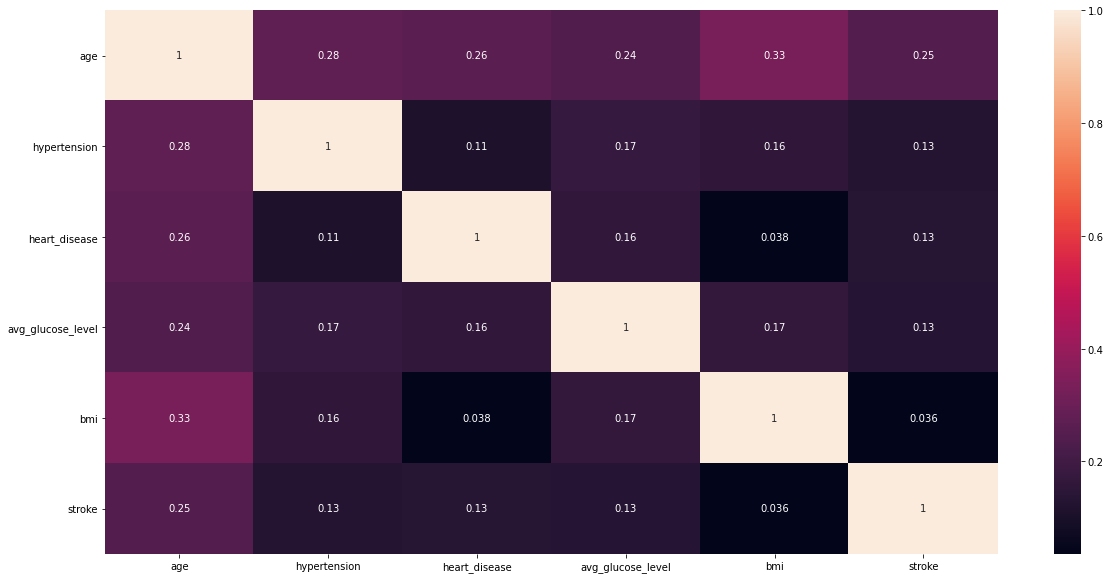

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(stroke_data.corr(), annot=True)

The strongest correlation with stroke is age. This is not surprising, as age is a well known risk factor for stroke. Other relatively strong correlations are with heart disease, hypertension and average glucose level. Surprisingly, bmi had a lower correlation than many others.

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Stroke vs non-stroke distributions of continuous variables</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Age</h3>

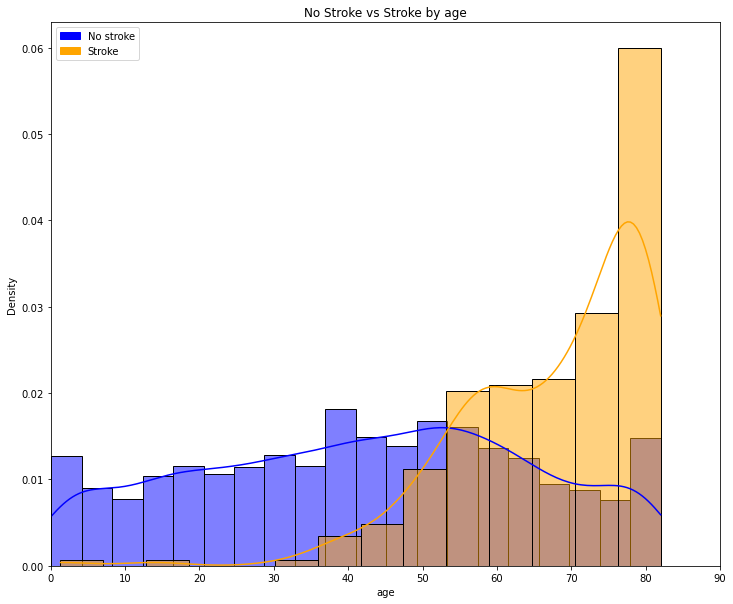

In [117]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['age'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['age'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by age')
plt.xlim([0,90])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

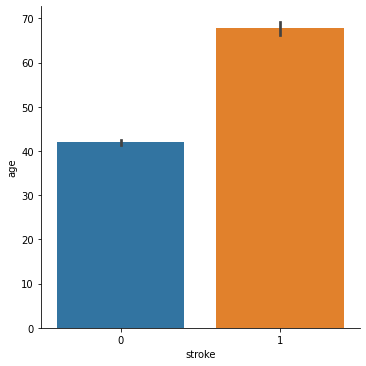

In [118]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='age', data=stroke_data, kind='bar')

Age is already a well established risk factor for stroke, and we can clearly see here these probably come from different distributions. 

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Glucose Level</h3>

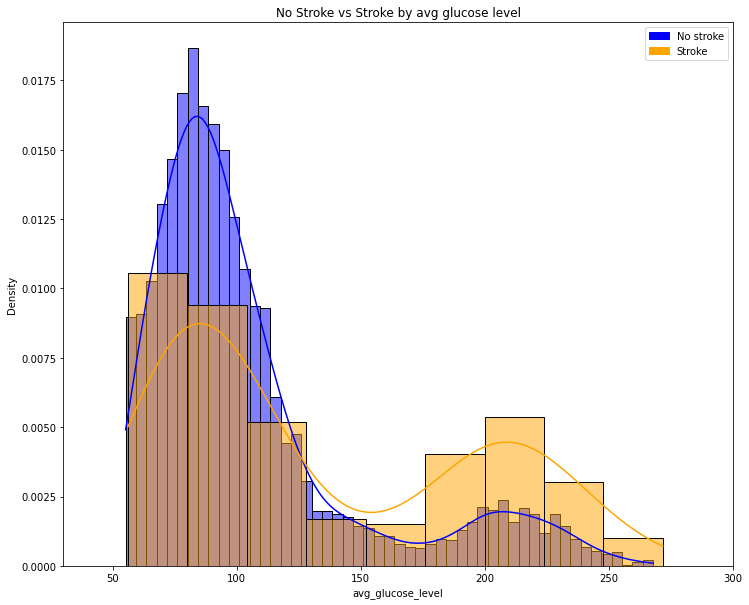

In [119]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by avg glucose level')
plt.xlim([30,300])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

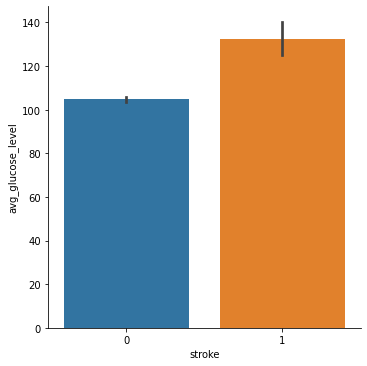

In [120]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='avg_glucose_level', data=stroke_data, kind='bar')

   These appear to be from different disributions

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">BMI</h3>

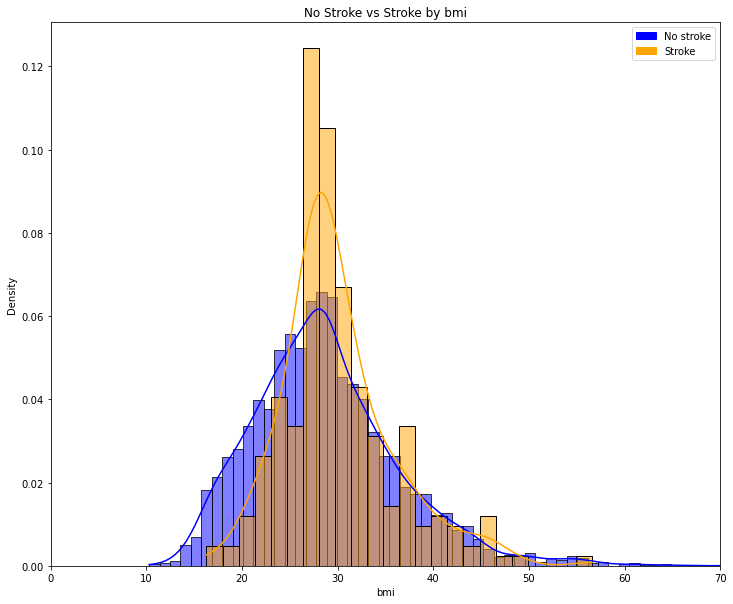

In [121]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['bmi'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['bmi'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by bmi')
plt.xlim([0,70])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

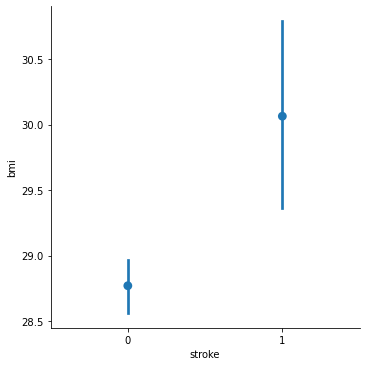

In [122]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='bmi', data=stroke_data, kind='point', join=False)

These seem to be from different distributions

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">The discrete variables</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Gender</h3>

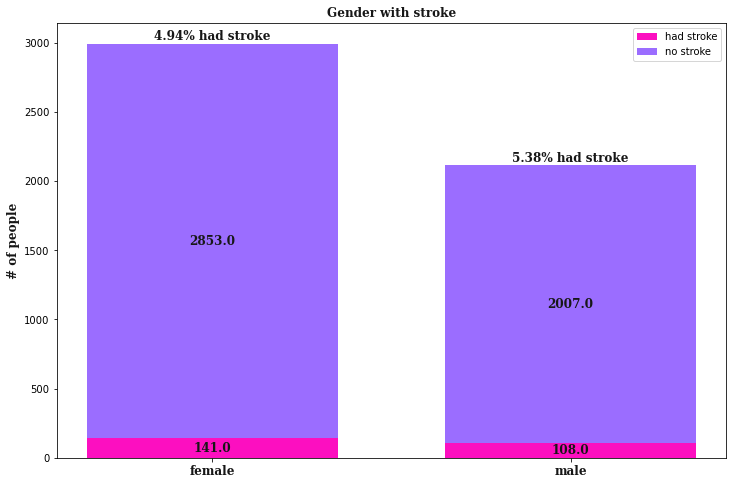

In [123]:
stroke = stroke_data[stroke_data['stroke'] == 1]['gender'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['gender'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['female', 'male'], font='Serif', weight='bold', size=12, color='#171717')
plt.bar(x/2, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values of each bar.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos+50, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})

plt.ylabel('# of people', font='Serif', weight='bold', size=12, color='#171717')
plt.title('Gender with stroke',font='Serif', weight='bold', size=12, color='#171717')
plt.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Hypertension</h3>

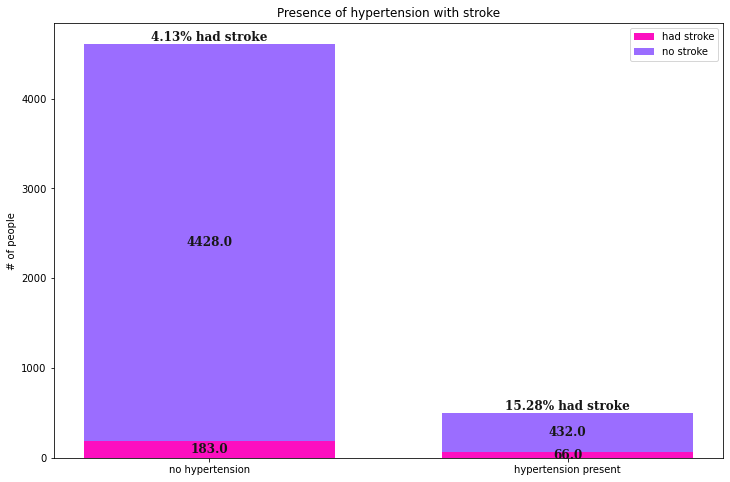

In [124]:
stroke = stroke_data[stroke_data['stroke'] == 1]['hypertension'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['hypertension'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no hypertension', 'hypertension present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Presence of hypertension with stroke')
plt.legend()

A pretty sizable difference, but with low numbers it may not be significant.

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Heart Disease</h3>

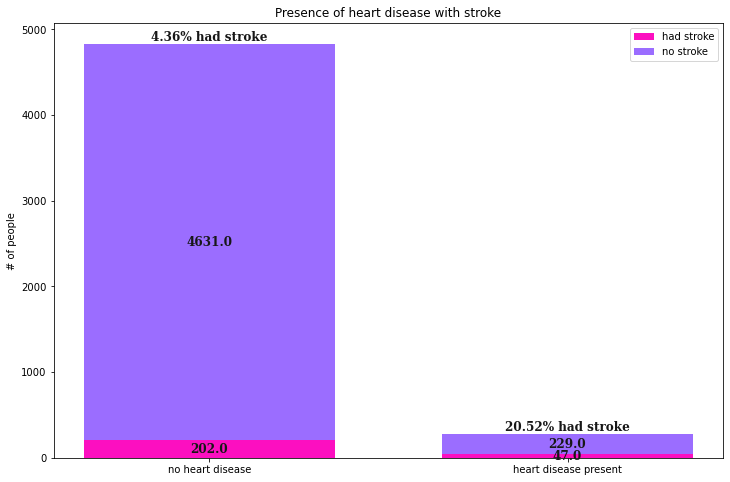

In [125]:
stroke = stroke_data[stroke_data['stroke'] == 1]['heart_disease'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['heart_disease'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no heart disease', 'heart disease present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Presence of heart disease with stroke')
plt.legend()

A pretty sizable difference, but again low numbers may not reveal a significant difference.

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Marriage</h3>

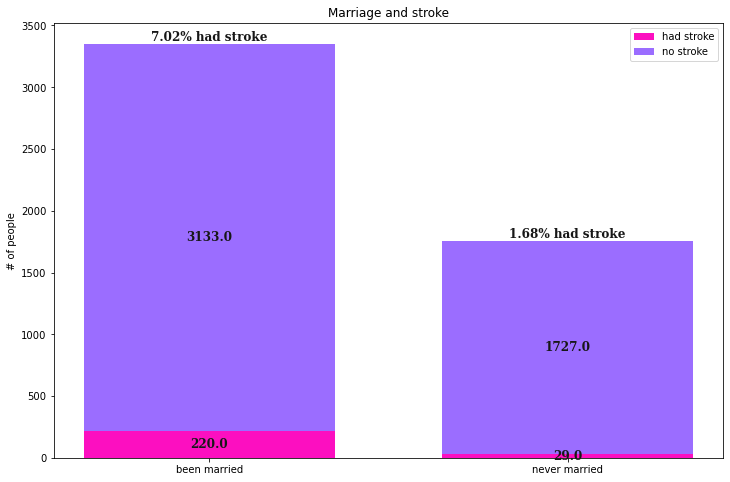

In [126]:
stroke = stroke_data[stroke_data['stroke'] == 1]['ever_married'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['ever_married'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['been married', 'never married'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Marriage and stroke')
plt.legend()

This is surprising, but is probably a spurious assocation that has more to do with age. 

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Residence Type</h3>

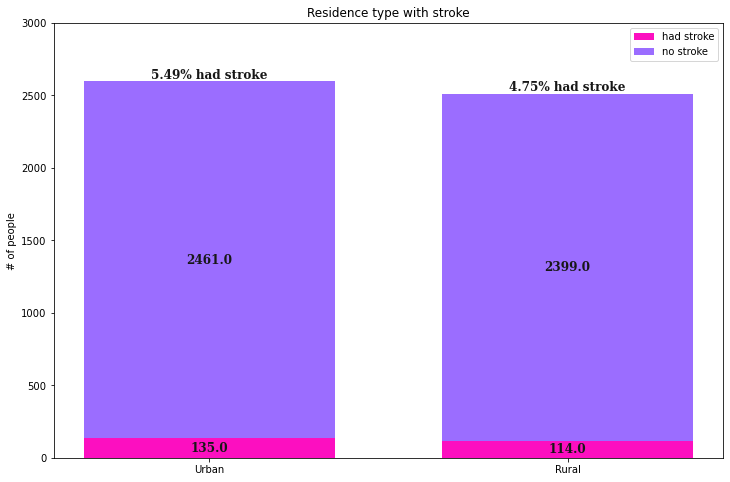

In [127]:
stroke = stroke_data[stroke_data['stroke'] == 1]['Residence_type'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['Residence_type'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['Urban', 'Rural'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})

plt.ylim([0,3000])
plt.ylabel('# of people')
plt.title('Residence type with stroke')
plt.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Job Type</h3>

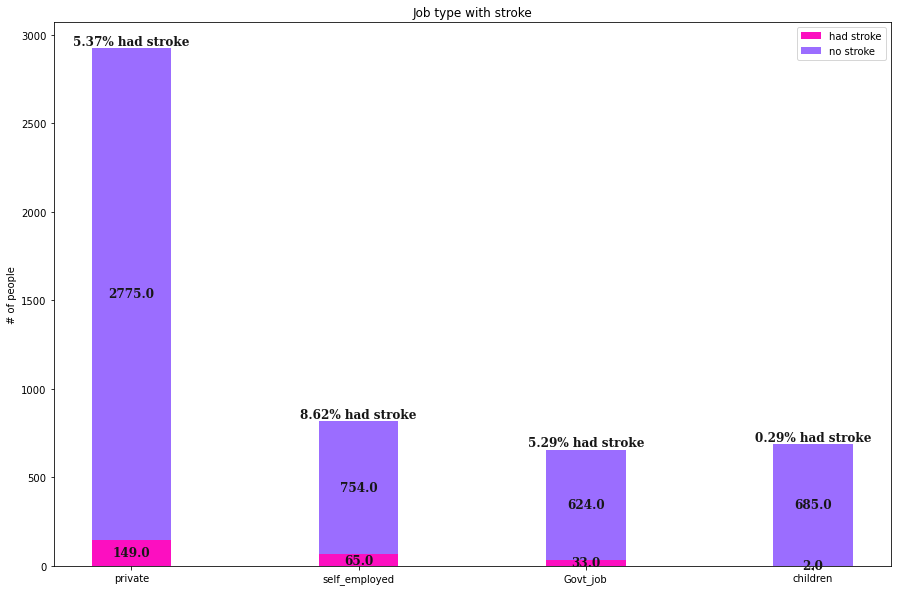

In [128]:
stroke = stroke_data[stroke_data['stroke'] == 1]['work_type'].value_counts()
no_stroke = stroke_data[(stroke_data['stroke'] == 0) & (stroke_data['work_type'] != 'Never_worked')]['work_type'].value_counts()
stroke = stroke[['Private', 'Self-employed', 'Govt_job', 'children']]
no_stroke = no_stroke[['Private', 'Self-employed', 'Govt_job', 'children']]

x = np.arange(4)
plt.figure(figsize=[15,10])
plt.xticks(x, ['private', 'self_employed', 'Govt_job', 'children'])
plt.bar(x, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Job type with stroke')
plt.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Smoking Status</h3>

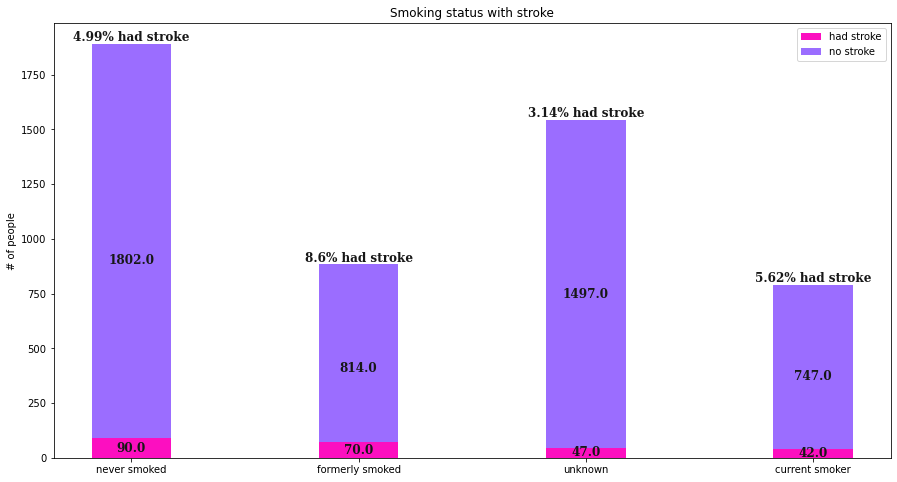

In [129]:
stroke = stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['smoking_status'].value_counts()
stroke = stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]
no_stroke = no_stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]

x = np.arange(4)
plt.figure(figsize=[15,8])
plt.xticks(x, ['never smoked', 'formerly smoked', 'unknown', 'current smoker'])
plt.bar(x, stroke, width=0.35, label='had stroke', color=hot_pink_color)
plt.bar(x, no_stroke, width=0.35, label='no stroke', color=light_purple, bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x, no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Smoking status with stroke')
plt.legend()

interesting that former smokers had a higher percentage of strokes than current smokers. Might be insignificant considering the low numbers though.

<a id = '2.4'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Encoding</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert gender column to a binary column where 0 is male and 1 is female</h3>

In [130]:
conv_gen = pd.get_dummies(stroke_data['gender'])
conv_gen2 = pd.concat((conv_gen, stroke_data), axis=1)
conv_gen2 = conv_gen2.drop(['gender'], axis=1)
conv_gen2 = conv_gen2.drop(['Male'], axis=1)
stroke_bin_convert = conv_gen2.rename(columns={'Female': 'gender'})
print(stroke_bin_convert)

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046        0  67.0             0              1          Yes        Private   
51676       1  61.0             0              0          Yes  Self-employed   
31112       0  80.0             0              1          Yes        Private   
60182       1  49.0             0              0          Yes        Private   
1665        1  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234       1  80.0             1              0          Yes        Private   
44873       1  81.0             0              0          Yes  Self-employed   
19723       1  35.0             0              0          Yes  Self-employed   
37544       0  51.0             0              0          Yes        Private   
44679       1  44.0             0       

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert ever_married column to binary where Yes is 1 and No is 0</h3>

In [131]:
conv_mar = pd.get_dummies(stroke_bin_convert['ever_married'])
conv_mar2 = pd.concat((conv_mar, stroke_bin_convert), axis=1)
conv_mar2 = conv_mar2.drop(['ever_married'], axis=1)
conv_mar2 = conv_mar2.drop(['No'], axis=1)
stroke_bin_convert = conv_mar2.rename(columns={'Yes': 'ever_married'})

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert Residence_type to binary where urban is 1 and rural is 0</h3>

In [132]:
conv_res = pd.get_dummies(stroke_bin_convert['Residence_type'])
conv_res2 = pd.concat((conv_res, stroke_bin_convert), axis=1)
conv_res2 = conv_res2.drop(['Residence_type'], axis=1)
conv_res2 = conv_res2.drop(['Rural'], axis=1)
stroke_bin_convert = conv_res2.rename(columns={'Urban': 'Residence_type'})
stroke_bin_convert

,Residence_type,ever_married,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,1,0,67.0,0,1,Private,228.69,36.6,formerly smoked,1
51676,0,1,1,61.0,0,0,Self-employed,202.21,28.9,never smoked,1
31112,0,1,0,80.0,0,1,Private,105.92,32.5,never smoked,1
60182,1,1,1,49.0,0,0,Private,171.23,34.4,smokes,1
1665,0,1,1,79.0,1,0,Self-employed,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,1,1,80.0,1,0,Private,83.75,27.5,never smoked,0
44873,1,1,1,81.0,0,0,Self-employed,125.20,40.0,never smoked,0
19723,0,1,1,35.0,0,0,Self-employed,82.99,30.6,never smoked,0


In [133]:
stroke_bin_convert = stroke_bin_convert[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
stroke_bin_convert

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,80.0,1,0,1,Private,1,83.75,27.5,never smoked,0
44873,1,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
19723,1,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Preparing to convert more categorical data</h3>

In [134]:
#Create a new dataframe, `stroke_cat_convert` from `stroke_bin_convert`
stroke_cat_convert = stroke_bin_convert
#Save the index just in case
stroke_cat_index = stroke_cat_convert.index
#Save the column names (using the `columns` attribute) just in case
stroke_cat_columns = stroke_cat_convert.columns
stroke_cat_convert.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert work_type and smoking_status categorical data into numeric values</h3>

In [135]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
stroke_full_convert = np.array(ct.fit_transform(stroke_cat_convert))

In [136]:
stroke_cat_columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [137]:
added_cols = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Unknown', 'formerly smoked', 'never smoked', 'smokes', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

In [138]:
stroke_df = pd.DataFrame(stroke_full_convert, columns = added_cols)

In [139]:
stroke_df

,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,61.0,0.0,0.0,1.0,0.0,202.21,28.9,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,80.0,1.0,0.0,1.0,1.0,83.75,27.5,0.0
5105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6,0.0
5107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6,0.0


<a id = '2.5'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Train Test Split</h3>

In [140]:
X = stroke_df.iloc[:, :-1].values
y = stroke_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=131)

<a id = '2.6'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Scaling</h3>

In [141]:
#Save the column names (using the `columns` attribute) of `stroke_scale` into the variable 'stroke_columns'
stroke_df_cols = stroke_df.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
X_train = pd.DataFrame(X_train, columns=stroke_df_cols[:-1])
X_test = pd.DataFrame(X_test, columns=stroke_df_cols[:-1])

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Verify scaling is correct with mean and std</h3>

In [143]:
X_train.mean()

Govt_job             8.939744e-16
Never_worked         7.670276e-17
Private              2.142200e-16
Self-employed        2.243630e-16
children            -1.359277e-15
Unknown             -3.443981e-16
formerly smoked     -1.537968e-16
never smoked         5.436644e-16
smokes              -1.128191e-16
gender              -3.374429e-16
age                 -3.610326e-16
hypertension         2.599214e-16
heart_disease       -7.584785e-16
ever_married        -6.496152e-16
Residence_type      -2.167702e-16
avg_glucose_level    7.954599e-15
bmi                  8.284043e-15
dtype: float64

In [144]:
X_train.std(ddof=0)

Govt_job             1.0
Never_worked         1.0
Private              1.0
Self-employed        1.0
children             1.0
Unknown              1.0
formerly smoked      1.0
never smoked         1.0
smokes               1.0
gender               1.0
age                  1.0
hypertension         1.0
heart_disease        1.0
ever_married         1.0
Residence_type       1.0
avg_glucose_level    1.0
bmi                  1.0
dtype: float64

In [145]:
X_train.shape

(3831, 17)

<a id = '2.7'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Selection</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Do we have any highly correlated values?</h3>

<AxesSubplot:>

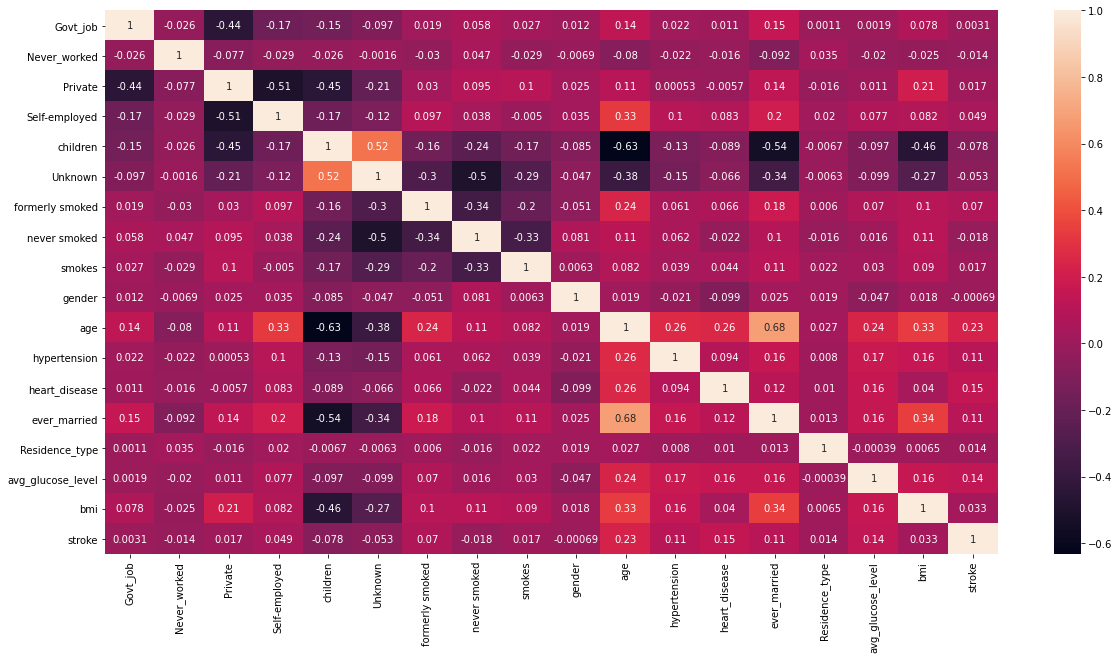

In [146]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.assign(stroke = y_train).corr(), annot=True)
#plt.savefig('data_corr.png')

We see some high correlations with age, ever_married and children. We will take out ever_married and children, along with unknown smoking status, because we can presume this will not be helpful to finding which features are important for predicting stroke. There are other features that have somewhat high correlations that we also might intuitively doubt their influence on any mode. Just something to keep an eye on. 

In [147]:
X_train = X_train.drop(['ever_married', 'Unknown', 'children'], axis=1)
X_test = X_test.drop(['ever_married', 'Unknown', 'children'], axis=1)

In [148]:
feat_labels = list(X_train.columns)

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Importance using Random Forest</h3>

In [149]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [150]:
initial_feat_imp = pd.DataFrame()

for feature in zip(feat_labels, clf.feature_importances_):
    feat_imp_series = pd.Series([feature[0], feature[1]])
    initial_feat_imp = initial_feat_imp.append(feat_imp_series, ignore_index=True)

initial_feat_imp.columns = ['Feature', 'Importance']
initial_feat_imp.sort_values(by='Importance', ascending=False)
    



,Feature,Importance
12,avg_glucose_level,0.285146
8,age,0.252947
13,bmi,0.240328
11,Residence_type,0.032242
7,gender,0.032159
10,heart_disease,0.026823
9,hypertension,0.026539
5,never smoked,0.023396
2,Private,0.019315
4,formerly smoked,0.017785


In [151]:
sfm = SelectFromModel(clf, threshold=0.02)
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

never smoked
gender
age
hypertension
heart_disease
Residence_type
avg_glucose_level
bmi


We set the cutoff at 0.02 and we opted not to include former_smoker and just to include never_smoked as to draw a distinction between those who never_smoked to those who are current or former smokers. 


In [152]:
X_train_reduced = X_train.drop(['Never_worked', 'Govt_job', 'Self-employed', 'smokes', 'Private', 'formerly smoked'], axis=1)
X_test_reduced = X_test.drop(['Never_worked', 'Govt_job', 'Self-employed', 'smokes', 'Private', 'formerly smoked'], axis=1)

<a id = '3'></a>
<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Cross-Validation with Manual Upsampling</h1>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">We will be using the following:</h3>
XGBoost,
BernoullliNB,
GausianNB,
LogisticRegression,
DecisionTree,
RandomForest,
SVC,
KNN,
LGBMClassifier

<a id = '3.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Individual Models without Hyperparameter Tuning</h3>

Our Custom made function that oversamples on each individual fold for cross-validation. This was done because oversampling on the full X_train and y_train led to extreme over fitting. This makes intuitive sense because when we oversample on the entire X_train, and then we do 5 fold cross validation, the validation holdout fold already has leaked data from the training folds. 

In [153]:
#example_params = {'n_estimators': 100, 'max_depth': 5}

def score_model(model, params, X_train, y_train, scoring, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = KFold(n_splits=5)

    smoter = SMOTE(.5)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = scoring(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

# Example of the model in action
#score_model(RandomForestClassifier, example_params, X_train, y_train, average_precision_score)

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">No hyperparameters and full features</h3>

In [154]:
example_params = {}
column_score_names = ['Model', 'Precision', 'Recall', 'F1', 'Average_Precision']
model_scores_full = pd.DataFrame()

initial_models = [('XGBClassifier', XGBClassifier(), XGBClassifier),
        ('BernoulliNB', BernoulliNB(), BernoulliNB),
        ('GaussianNB', GaussianNB(), GaussianNB),
        ('Logistic Regression', LogisticRegression(), LogisticRegression),
        ('SVM', SVC(probability=True), SVC),
        ('Decision Tree Classifier', DecisionTreeClassifier(), DecisionTreeClassifier),
        ('Random Forest Classifier', RandomForestClassifier(), RandomForestClassifier),
        ('KNeighbors Classifier', KNeighborsClassifier(), KNeighborsClassifier),
        ('LGBM Classifier', LGBMClassifier(), LGBMClassifier)
       ]

for j, i, k in initial_models:
    model = i
    model.fit(X_train, y_train)
    
    prec_score = score_model(k, example_params, X_train, y_train, precision_score)
    rec_score = score_model(k, example_params, X_train, y_train, recall_score)
    f1 = score_model(k, example_params, X_train, y_train, f1_score)
    avg_prec = score_model(k, example_params, X_train, y_train, average_precision_score)
    
    model_w_scores = pd.Series([j,
                                prec_score.mean() * 100,
                                rec_score.mean() *100, 
                                f1.mean()*100,
                                avg_prec.mean() * 100])
    model_scores_full = model_scores_full.append(model_w_scores, ignore_index=True)

model_scores_full.columns = column_score_names
model_scores_full = model_scores_full.set_index('Model')

[20:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[20:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">No hyperparameters and reduced features</h3>

In [155]:
example_params = {}
column_score_names = ['Model', 'Precision', 'Recall', 'F1', 'Average_Precision']
model_scores_reduced = pd.DataFrame()

initial_models = [('XGBClassifier', XGBClassifier(), XGBClassifier),
        ('BernoulliNB', BernoulliNB(), BernoulliNB),
        ('GaussianNB', GaussianNB(), GaussianNB),
        ('Logistic Regression', LogisticRegression(), LogisticRegression),
        ('SVM', SVC(probability=True), SVC),
        ('Decision Tree Classifier', DecisionTreeClassifier(), DecisionTreeClassifier),
        ('Random Forest Classifier', RandomForestClassifier(), RandomForestClassifier),
        ('KNeighbors Classifier', KNeighborsClassifier(), KNeighborsClassifier),
        ('LGBM Classifier', LGBMClassifier(), LGBMClassifier)
       ]

for j, i, k in initial_models:
    model = i
    model.fit(X_train_reduced, y_train)
    
    prec_score = score_model(k, example_params, X_train_reduced, y_train, precision_score)
    rec_score = score_model(k, example_params, X_train_reduced, y_train, recall_score)
    f1 = score_model(k, example_params, X_train_reduced, y_train, f1_score)
    avg_prec = score_model(k, example_params, X_train_reduced, y_train, average_precision_score)
    
    model_w_scores = pd.Series([j,
                                prec_score.mean() * 100,
                                rec_score.mean() *100, 
                                f1.mean()*100,
                                avg_prec.mean() * 100])
    model_scores_reduced = model_scores_reduced.append(model_w_scores, ignore_index=True)

model_scores_reduced.columns = column_score_names
model_scores_reduced = model_scores_reduced.set_index('Model')

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


[20:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


<a id = '3.2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Summary Tables of Performance</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Full Features</h3>

In [156]:
model_scores_full.sort_values(by='Average_Precision', ascending=False)

,Precision,Recall,F1,Average_Precision
Model,,,,
Logistic Regression,15.212521,61.005301,24.410216,10.178911
BernoulliNB,10.329192,50.063269,17.080498,7.601523
Decision Tree Classifier,7.986890,20.861540,14.512313,6.216417
SVM,10.660440,26.916391,14.655540,5.961520
GaussianNB,5.699670,98.301478,10.607525,5.562810
LGBM Classifier,14.082268,7.497989,10.116579,5.520054
Random Forest Classifier,11.786435,7.558116,9.910236,5.251212
XGBClassifier,17.515528,8.818691,9.648943,5.233886
KNeighbors Classifier,6.305877,21.696640,10.002668,4.974677


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Reduced Features</h3>

In [157]:
model_scores_reduced.sort_values(by='Average_Precision', ascending=False)

,Precision,Recall,F1,Average_Precision
Model,,,,
Logistic Regression,15.593961,61.206287,25.578967,11.434344
GaussianNB,14.411857,52.532154,22.641204,9.720808
BernoulliNB,11.618700,50.682359,18.984168,8.103071
SVM,12.944088,36.978991,18.455922,7.985479
KNeighbors Classifier,11.098049,31.872117,16.345410,6.853469
Random Forest Classifier,9.978151,17.445932,13.983472,6.704913
LGBM Classifier,15.085179,5.287657,9.942789,6.311117
Decision Tree Classifier,8.417882,23.689444,13.390273,5.662336
XGBClassifier,13.080882,5.873199,9.943591,4.926190


It seems our slightly reduced set of features is giving us better scores across the board. let's make the reduced feature set our main set going forward. 

In [158]:
X_train_full = X_train
X_test_full = X_test

X_train = X_train_reduced
X_test = X_test_reduced

<a id = '3.3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Hyperparameter Tuning</h3>

The scores we are most concerned with are recall and average precision, as these are preferable for classification problems with highly imbalanced datasets as it focuses on the minority class. 

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Focus on Recall and Average Precision score</h3>

In [159]:
GridSearch_cols = ['Model', 'Precision Score', 'Precision Params', 'F1 Score', 'F1 Params', 'Recall Score', 'Recall Params', 'Avg Precision Score', 'Avg Precision Params']
GridSearch = pd.DataFrame()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Here we are creating a lot of code to create functions that can easily run hyperparameter tuning using our custom made oversampling function. the functions are as follows:</h3>


1. score_xgb(X_train, y_train)
2. score_bern(X_train, y_train)
3. score_gauss(X_train, y_train)
4. score_lr(X_train, y_train)
5. score_svm(X_train, y_train)
6. score_dtc(X_train, y_train)
7. score_rfc(X_train, y_train)
8. score_knn(X_train, y_train)
9. score_lgbm(X_train, y_train)
10. score_ALL_append_table(X_train, y_train)
11. append_table()

In [160]:
# XGB Classifier
def score_xgb(X_train, y_train):    
    model_params = {
        'learning_rate': [0.01, 0.05, 0.1],
        'eval_metric': ['error']
    }

    #precision
    score_tracker = []
    for learning_rate in model_params['learning_rate']:
        for eval_metric in model_params['eval_metric']:
            example_params = {
            'learning_rate': learning_rate,
            'eval_metric': eval_metric
        }
            example_params['Precision'] = (score_model(XGBClassifier, example_params, X_train, y_train, precision_score).mean()) * 100
            score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for learning_rate in model_params['learning_rate']:
        for eval_metric in model_params['eval_metric']:
            example_params = {
            'learning_rate': learning_rate,
            'eval_metric': eval_metric
        }
            example_params['F1'] = (score_model(XGBClassifier, example_params, X_train, y_train, f1_score).mean()) * 100
            score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    #recall
    score_tracker = []
    for learning_rate in model_params['learning_rate']:
        for eval_metric in model_params['eval_metric']:
            example_params = {
            'learning_rate': learning_rate,
            'eval_metric': eval_metric
        }
            example_params['Recall'] = (score_model(XGBClassifier, example_params, X_train, y_train, recall_score).mean()) * 100
            score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for learning_rate in model_params['learning_rate']:
        for eval_metric in model_params['eval_metric']:
            example_params = {
            'learning_rate': learning_rate,
            'eval_metric': eval_metric
        }
            example_params['Avg Precision'] = (score_model(XGBClassifier, example_params, X_train, y_train, average_precision_score).mean()) * 100
            score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['XGBClassifier',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    XGB_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return XGB_complete

# BernoulliNB
def score_bern(X_train, y_train):
    model_params = {
        'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
    }

    #precision
    score_tracker = []
    for alpha in model_params['alpha']:
        example_params = {
            'alpha': alpha,
        }
        example_params['Precision'] = (score_model(BernoulliNB, example_params, X_train, y_train, precision_score).mean()) * 100
        score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for alpha in model_params['alpha']:
        example_params = {
            'alpha': alpha,
        }
        example_params['F1'] = (score_model(BernoulliNB, example_params, X_train, y_train, f1_score).mean()) * 100
        score_tracker.append(example_params)

    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]

    #recall
    score_tracker = []
    for alpha in model_params['alpha']:
        example_params = {
            'alpha': alpha,
        }
        example_params['Recall'] = (score_model(BernoulliNB, example_params, X_train, y_train, recall_score).mean()) * 100
        score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for alpha in model_params['alpha']:
        example_params = {
            'alpha': alpha,
        }
        example_params['Avg Precision'] = (score_model(BernoulliNB, example_params, X_train, y_train, average_precision_score).mean()) * 100
        score_tracker.append(example_params)

    # What's the best model?
    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['BernoulliNB',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    bern_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return bern_complete

# GaussianNB
def score_gauss(X_train, y_train):  
    model_params = {
        'var_smoothing': np.logspace(0,-9, num=100)
    }

    #precision
    score_tracker = []
    for var_smoothing in model_params['var_smoothing']:
        example_params = {
            'var_smoothing': var_smoothing,
        }
        example_params['Precision'] = (score_model(GaussianNB, example_params, X_train, y_train, precision_score).mean()) * 100
        score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for var_smoothing in model_params['var_smoothing']:
        example_params = {
            'var_smoothing': var_smoothing,
        }
        example_params['F1'] = (score_model(GaussianNB, example_params, X_train, y_train, f1_score).mean()) * 100
        score_tracker.append(example_params)

    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]

    #recall
    score_tracker = []
    for var_smoothing in model_params['var_smoothing']:
        example_params = {
            'var_smoothing': var_smoothing,
        }
        example_params['Recall'] = (score_model(GaussianNB, example_params, X_train, y_train, recall_score).mean()) * 100
        score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for var_smoothing in model_params['var_smoothing']:
        example_params = {
            'var_smoothing': var_smoothing,
        }
        example_params['Avg Precision'] = (score_model(GaussianNB, example_params, X_train, y_train, average_precision_score).mean()) * 100
        score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['GaussianNB',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    gauss_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return gauss_complete


# Logistic Regression (trying to add more params)
def score_lr(X_train, y_train):    
    model_params = {
        'penalty': ['l2', 'none'],
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'solver':['newton-cg', 'lbfgs', 'sag', 'saga']
    }

    #precision
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            for solver in model_params['solver']:
                example_params = {
                'penalty': penalty,
                'C': C,
                'solver': solver
            }
                example_params['Precision'] = (score_model(LogisticRegression, example_params, X_train, y_train, precision_score).mean()) * 100
                score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            for solver in model_params['solver']:
                example_params = {
                'penalty': penalty,
                'C': C,
                'solver': solver
            }
                example_params['F1'] = (score_model(LogisticRegression, example_params, X_train, y_train, f1_score).mean()) * 100
                score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    
    #recall
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            for solver in model_params['solver']:
                example_params = {
                'penalty': penalty,
                'C': C,
                'solver': solver
            }
                example_params['Recall'] = (score_model(LogisticRegression, example_params, X_train, y_train, recall_score).mean()) * 100
                score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            for solver in model_params['solver']:
                example_params = {
                'penalty': penalty,
                'C': C,
                'solver': solver
            }
                example_params['Avg Precision'] = (score_model(LogisticRegression, example_params, X_train, y_train, average_precision_score).mean()) * 100
                score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['LogisticRegression',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    lr_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return lr_complete
"""
# Logistic Regression with more limited params
# Logistic Regression
def score_lr(X_train, y_train):    
    model_params = {
        'penalty': ['l2', 'none'],
        'C': [0.001,0.01,0.1,1,10,100,1000],
    }

    #precision
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            
            example_params = {
            'penalty': penalty,
            'C': C,
        }
            example_params['Precision'] = (score_model(LogisticRegression, example_params, X_train, y_train, precision_score).mean()) * 100
            score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            example_params = {
            'penalty': penalty,
            'C': C,
        }
            example_params['F1'] = (score_model(LogisticRegression, example_params, X_train, y_train, f1_score).mean()) * 100
            score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    
    #recall
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            example_params = {
            'penalty': penalty,
            'C': C,
        }
            example_params['Recall'] = (score_model(LogisticRegression, example_params, X_train, y_train, recall_score).mean()) * 100
            score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for penalty in model_params['penalty']:
        for C in model_params['C']:
            example_params = {
            'penalty': penalty,
            'C': C,
        }
            example_params['Avg Precision'] = (score_model(LogisticRegression, example_params, X_train, y_train, average_precision_score).mean()) * 100
            score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['LogisticRegression',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    lr_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return lr_complete
"""

# SVM
def score_svm(X_train, y_train):    
    model_params = {
        'kernel': ['linear', 'rbf'],
        'C': [0.25,0.5,0.75,1]
    }

    #precision
    score_tracker = []
    for kernel in model_params['kernel']:
        for C in model_params['C']:
            example_params = {
            'kernel': kernel,
            'C': C
        }
            example_params['Precision'] = (score_model(SVC, example_params, X_train, y_train, precision_score).mean()) * 100
            score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for kernel in model_params['kernel']:
        for C in model_params['C']:
            example_params = {
            'kernel': kernel,
            'C': C
        }
            example_params['F1'] = (score_model(SVC, example_params, X_train, y_train, f1_score).mean()) * 100
            score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    
    #recall
    score_tracker = []
    for kernel in model_params['kernel']:
        for C in model_params['C']:
            example_params = {
            'kernel': kernel,
            'C': C
        }
            example_params['Recall'] = (score_model(SVC, example_params, X_train, y_train, recall_score).mean()) * 100
            score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for kernel in model_params['kernel']:
        for C in model_params['C']:
            example_params = {
            'kernel': kernel,
            'C': C
        }
            example_params['Avg Precision'] = (score_model(SVC, example_params, X_train, y_train, average_precision_score).mean()) * 100
            score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['SVM',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    svm_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return svm_complete

# Decision Tree Classifier
def score_dtc(X_train, y_train):    
    model_params = {
        'criterion': ['gini', 'entropy']
    }

    #precision
    score_tracker = []
    for criterion in model_params['criterion']:
        example_params = {
            'criterion': criterion,
        }
        example_params['Precision'] = (score_model(DecisionTreeClassifier, example_params, X_train, y_train, precision_score).mean()) * 100
        score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for criterion in model_params['criterion']:
        example_params = {
            'criterion': criterion,
        }
        example_params['F1'] = (score_model(DecisionTreeClassifier, example_params, X_train, y_train, f1_score).mean()) * 100
        score_tracker.append(example_params)

    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]

    #recall
    score_tracker = []
    for criterion in model_params['criterion']:
        example_params = {
            'criterion': criterion,
        }
        example_params['Recall'] = (score_model(DecisionTreeClassifier, example_params, X_train, y_train, recall_score).mean()) * 100
        score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for criterion in model_params['criterion']:
        example_params = {
            'criterion': criterion,
        }
        example_params['Avg Precision'] = (score_model(DecisionTreeClassifier, example_params, X_train, y_train, average_precision_score).mean()) * 100
        score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['Decision Tree Classifier',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    dtc_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return dtc_complete

# Random Forest Classifier
def score_rfc(X_train, y_train):    
    model_params = {
        'n_estimators': [80,100,150,200,300, 500],
        'criterion': ['gini', 'entropy']
    }

    #precision
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for criterion in model_params['criterion']:
            example_params = {
            'n_estimators': n_estimators,
            'criterion': criterion
        }
            example_params['Precision'] = (score_model(RandomForestClassifier, example_params, X_train, y_train, precision_score).mean()) * 100
            score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for criterion in model_params['criterion']:
            example_params = {
            'n_estimators': n_estimators,
            'criterion': criterion
        }
            example_params['F1'] = (score_model(RandomForestClassifier, example_params, X_train, y_train, f1_score).mean()) * 100
            score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    
    #recall
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for criterion in model_params['criterion']:
            example_params = {
            'n_estimators': n_estimators,
            'criterion': criterion
        }
            example_params['Recall'] = (score_model(RandomForestClassifier, example_params, X_train, y_train, recall_score).mean()) * 100
            score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for criterion in model_params['criterion']:
            example_params = {
            'n_estimators': n_estimators,
            'criterion': criterion
        }
            example_params['Avg Precision'] = (score_model(RandomForestClassifier, example_params, X_train, y_train, average_precision_score).mean()) * 100
            score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['Random Forest',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    rfc_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return rfc_complete

# K-Nearest Neighbor
def score_knn(X_train, y_train):    
    model_params = {
        'n_neighbors': [3,5,7,8,10],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    }

    #precision
    score_tracker = []
    for n_neighbors in model_params['n_neighbors']:
        for metric in model_params['metric']:
            example_params = {
            'n_neighbors': n_neighbors,
            'metric': metric
        }
            example_params['Precision'] = (score_model(KNeighborsClassifier, example_params, X_train, y_train, precision_score).mean()) * 100
            score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for n_neighbors in model_params['n_neighbors']:
        for metric in model_params['metric']:
            example_params = {
            'n_neighbors': n_neighbors,
            'metric': metric
        }
            example_params['F1'] = (score_model(KNeighborsClassifier, example_params, X_train, y_train, f1_score).mean()) * 100
            score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    
    #recall
    score_tracker = []
    for n_neighbors in model_params['n_neighbors']:
        for metric in model_params['metric']:
            example_params = {
            'n_neighbors': n_neighbors,
            'metric': metric
        }
            example_params['Recall'] = (score_model(KNeighborsClassifier, example_params, X_train, y_train, recall_score).mean()) * 100
            score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for n_neighbors in model_params['n_neighbors']:
        for metric in model_params['metric']:
            example_params = {
            'n_neighbors': n_neighbors,
            'metric': metric
        }
            example_params['Avg Precision'] = (score_model(KNeighborsClassifier, example_params, X_train, y_train, average_precision_score).mean()) * 100
            score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['KNN',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    knn_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return knn_complete

# LGBM
def score_lgbm(X_train, y_train):    
    model_params = {
        'n_estimators': range(200, 600, 80),
        'num_leaves': range(20,60,10)
    }

    #precision
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for num_leaves in model_params['num_leaves']:
            example_params = {
            'n_estimators': n_estimators,
            'num_leaves': num_leaves
        }
            example_params['Precision'] = (score_model(LGBMClassifier, example_params, X_train, y_train, precision_score).mean()) * 100
            score_tracker.append(example_params)

    prec = sorted(score_tracker, key=lambda x: x['Precision'], reverse=True)[0]

    #f1
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for num_leaves in model_params['num_leaves']:
            example_params = {
            'n_estimators': n_estimators,
            'num_leaves': num_leaves
        }
            example_params['F1'] = (score_model(LGBMClassifier, example_params, X_train, y_train, f1_score).mean()) * 100
            score_tracker.append(example_params)
    f1 = sorted(score_tracker, key=lambda x: x['F1'], reverse=True)[0]
    
    #recall
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for num_leaves in model_params['num_leaves']:
            example_params = {
            'n_estimators': n_estimators,
            'num_leaves': num_leaves
        }
            example_params['Recall'] = (score_model(LGBMClassifier, example_params, X_train, y_train, recall_score).mean()) * 100
            score_tracker.append(example_params)

    rec = sorted(score_tracker, key=lambda x: x['Recall'], reverse=True)[0]

    #average precision
    score_tracker = []
    for n_estimators in model_params['n_estimators']:
        for num_leaves in model_params['num_leaves']:
            example_params = {
            'n_estimators': n_estimators,
            'num_leaves': num_leaves
        }
            example_params['Avg Precision'] = (score_model(LGBMClassifier, example_params, X_train, y_train, average_precision_score).mean()) * 100
            score_tracker.append(example_params)

    avg_prec = sorted(score_tracker, key=lambda x: x['Avg Precision'], reverse=True)[0]

    #put it all together
    model_scores_params = pd.Series(['LGBM Classifier',
                                 prec,
                                    f1,
                                    rec,
                                    avg_prec])

    lgbm_complete = pd.Series([model_scores_params[0],
                              model_scores_params[1].get('Precision'),
                              model_scores_params[1],
                              model_scores_params[2].get('F1'),
                              model_scores_params[2],
                              model_scores_params[3].get('Recall'),
                              model_scores_params[3],
                              model_scores_params[4].get('Avg Precision'),
                              model_scores_params[4],
                             ])
    return lgbm_complete

# run all models, clear existing table and append to new table
def score_ALL_append_table(X_train, y_train):
    #reset GridSearch
    GridSearch_cols = ['Model', 'Precision Score', 'Precision Params', 'F1 Score', 'F1 Params', 'Recall Score', 'Recall Params', 'Avg Precision Score', 'Avg Precision Params']
    GridSearch = pd.DataFrame()
    
    #run all scoring functions
    XGB_complete = score_xgb(X_train, y_train)
    bern_complete = score_bern(X_train, y_train)
    gauss_complete = score_gauss(X_train, y_train)
    lr_complete = score_lr(X_train, y_train)
    svm_complete = score_svm(X_train, y_train)
    dtc_complete = score_dtc(X_train, y_train)
    rfc_complete = score_rfc(X_train, y_train)
    knn_complete = score_knn(X_train, y_train)
    lgbm_complete= score_lgbm(X_train, y_train)
    
    #append new scores to GridSearch
    GridSearch = GridSearch.append(XGB_complete, ignore_index=True)
    GridSearch = GridSearch.append(bern_complete, ignore_index=True)
    GridSearch = GridSearch.append(gauss_complete, ignore_index=True)
    GridSearch = GridSearch.append(lr_complete, ignore_index=True)
    GridSearch = GridSearch.append(dtc_complete, ignore_index=True)
    GridSearch = GridSearch.append(rfc_complete, ignore_index=True)
    GridSearch = GridSearch.append(knn_complete, ignore_index=True)
    GridSearch = GridSearch.append(lgbm_complete, ignore_index=True)
    GridSearch = GridSearch.append(svm_complete, ignore_index=True)
    GridSearch.columns = GridSearch_cols
    GridSearch = GridSearch.set_index('Model')
    
    return GridSearch
    

# simply append for a new table without running all scoring models

def append_table():
    GridSearch_cols = ['Model', 'Precision Score', 'Precision Params', 'F1 Score', 'F1 Params', 'Recall Score', 'Recall Params', 'Avg Precision Score', 'Avg Precision Params']
    GridSearch = pd.DataFrame()
    
    GridSearch = GridSearch.append(XGB_complete, ignore_index=True)
    GridSearch = GridSearch.append(bern_complete, ignore_index=True)
    GridSearch = GridSearch.append(gauss_complete, ignore_index=True)
    GridSearch = GridSearch.append(lr_complete, ignore_index=True)
    GridSearch = GridSearch.append(dtc_complete, ignore_index=True)
    GridSearch = GridSearch.append(rfc_complete, ignore_index=True)
    GridSearch = GridSearch.append(knn_complete, ignore_index=True)
    GridSearch = GridSearch.append(lgbm_complete, ignore_index=True)
    GridSearch = GridSearch.append(svm_complete, ignore_index=True)
    GridSearch.columns = GridSearch_cols
    GridSearch = GridSearch.set_index('Model')
    
    return GridSearch
    


<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">GridSearch with Reduced Features</h3>

In [161]:
GridSearch_reduced = score_ALL_append_table(X_train, y_train)

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning:

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarnin

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_str

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_str

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnin

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

In [176]:
GridSearch_reduced.sort_values(by='Avg Precision Score', ascending=False)

,Precision Score,Precision Params,F1 Score,F1 Params,Recall Score,Recall Params,Avg Precision Score,Avg Precision Params
Model,,,,,,,,
LogisticRegression,19.895064,"{'penalty': 'l2', 'C': 0.001, 'solver': 'saga'...",25.820877,"{'penalty': 'none', 'C': 10, 'solver': 'newton...",64.387221,"{'penalty': 'none', 'C': 1, 'solver': 'lbfgs',...",12.226517,"{'penalty': 'none', 'C': 0.001, 'solver': 'sag..."
SVM,15.101220,"{'kernel': 'linear', 'C': 0.5, 'Precision': 15...",24.374908,"{'kernel': 'linear', 'C': 0.75, 'F1': 24.37490...",67.300815,"{'kernel': 'linear', 'C': 0.5, 'Recall': 67.30...",11.498529,"{'kernel': 'linear', 'C': 1, 'Avg Precision': ..."
GaussianNB,17.218899,"{'var_smoothing': 1.0, 'Precision': 17.2188991...",23.614659,"{'var_smoothing': 0.8111308307896871, 'F1': 23...",53.044974,"{'var_smoothing': 1.232846739442066e-06, 'Reca...",9.869949,"{'var_smoothing': 1.2328467394420658e-05, 'Avg..."
XGBClassifier,14.600121,"{'learning_rate': 0.05, 'eval_metric': 'error'...",22.723429,"{'learning_rate': 0.01, 'eval_metric': 'error'...",48.949757,"{'learning_rate': 0.01, 'eval_metric': 'error'...",9.453914,"{'learning_rate': 0.01, 'eval_metric': 'error'..."
BernoulliNB,12.021081,"{'alpha': 1.0, 'Precision': 12.021080868602699}",19.353754,"{'alpha': 0.01, 'F1': 19.353754350909874}",51.253788,"{'alpha': 1.0, 'Recall': 51.25378768982773}",8.277728,"{'alpha': 0.1, 'Avg Precision': 8.277728093173..."
KNN,11.460664,"{'n_neighbors': 8, 'metric': 'manhattan', 'Pre...",17.311711,"{'n_neighbors': 10, 'metric': 'chebyshev', 'F1...",41.510245,"{'n_neighbors': 10, 'metric': 'chebyshev', 'Re...",7.413449,"{'n_neighbors': 10, 'metric': 'chebyshev', 'Av..."
Decision Tree Classifier,11.071464,"{'criterion': 'gini', 'Precision': 11.07146429...",15.291605,"{'criterion': 'entropy', 'F1': 15.291604576403...",25.051342,"{'criterion': 'entropy', 'Recall': 25.05134184...",6.451712,"{'criterion': 'entropy', 'Avg Precision': 6.45..."
Random Forest,12.988236,"{'n_estimators': 150, 'criterion': 'gini', 'Pr...",16.921437,"{'n_estimators': 300, 'criterion': 'gini', 'F1...",16.948236,"{'n_estimators': 300, 'criterion': 'entropy', ...",6.438698,"{'n_estimators': 200, 'criterion': 'gini', 'Av..."
LGBM Classifier,13.416667,"{'n_estimators': 280, 'num_leaves': 50, 'Preci...",12.192754,"{'n_estimators': 280, 'num_leaves': 40, 'F1': ...",10.308481,"{'n_estimators': 200, 'num_leaves': 40, 'Recal...",5.753206,"{'n_estimators': 200, 'num_leaves': 30, 'Avg P..."


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Hyperparameters of the best model. High average precision score is what we are aiming for</h3>

In [168]:
GridSearch_reduced.loc['LogisticRegression']

Precision Score                                                   19.8951
Precision Params        {'penalty': 'l2', 'C': 0.001, 'solver': 'saga'...
F1 Score                                                          25.8209
F1 Params               {'penalty': 'none', 'C': 10, 'solver': 'newton...
Recall Score                                                      64.3872
Recall Params           {'penalty': 'none', 'C': 1, 'solver': 'lbfgs',...
Avg Precision Score                                               12.2265
Avg Precision Params    {'penalty': 'none', 'C': 0.001, 'solver': 'sag...
Name: LogisticRegression, dtype: object

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">GridSearch with full features</h3>

In [164]:
GridSearch_full = score_ALL_append_table(X_train_full, y_train)

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning:

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rot

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.p

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an 

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\sit

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_ite

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did no

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\sit

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an 

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ro

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\rotzn\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these a

In [198]:
GridSearch_full.sort_values(by='Avg Precision Score', ascending=False)

,Precision Score,Precision Params,F1 Score,F1 Params,Recall Score,Recall Params,Avg Precision Score,Avg Precision Params
Model,,,,,,,,
LogisticRegression,20.577101,"{'penalty': 'l2', 'C': 0.001, 'solver': 'newto...",26.015395,"{'penalty': 'l2', 'C': 0.01, 'solver': 'lbfgs'...",62.161764,"{'penalty': 'none', 'C': 0.1, 'solver': 'lbfgs...",11.446752,"{'penalty': 'l2', 'C': 0.01, 'solver': 'sag', ..."
SVM,14.290160,"{'kernel': 'linear', 'C': 0.75, 'Precision': 1...",23.251908,"{'kernel': 'linear', 'C': 0.75, 'F1': 23.25190...",63.229240,"{'kernel': 'linear', 'C': 0.25, 'Recall': 63.2...",10.807522,"{'kernel': 'linear', 'C': 0.5, 'Avg Precision'..."
GaussianNB,16.368303,"{'var_smoothing': 1.0, 'Precision': 16.3683031...",22.919337,"{'var_smoothing': 0.8111308307896871, 'F1': 22...",98.301478,"{'var_smoothing': 2.848035868435799e-06, 'Reca...",9.962811,"{'var_smoothing': 0.8111308307896871, 'Avg Pre..."
XGBClassifier,15.861845,"{'learning_rate': 0.05, 'eval_metric': 'error'...",20.789468,"{'learning_rate': 0.01, 'eval_metric': 'error'...",35.104645,"{'learning_rate': 0.01, 'eval_metric': 'error'...",8.107973,"{'learning_rate': 0.01, 'eval_metric': 'error'..."
BernoulliNB,10.477970,"{'alpha': 0.1, 'Precision': 10.47797002474177}",17.481158,"{'alpha': 0.01, 'F1': 17.48115763200889}",51.296632,"{'alpha': 0.01, 'Recall': 51.29663237783372}",7.757493,"{'alpha': 0.01, 'Avg Precision': 7.75749317362..."
Decision Tree Classifier,12.111188,"{'criterion': 'entropy', 'Precision': 12.11118...",14.854721,"{'criterion': 'gini', 'F1': 14.854721312125186}",19.778669,"{'criterion': 'gini', 'Recall': 19.77866925586...",6.157997,"{'criterion': 'entropy', 'Avg Precision': 6.15..."
KNN,9.118598,"{'n_neighbors': 10, 'metric': 'minkowski', 'Pr...",14.492722,"{'n_neighbors': 10, 'metric': 'minkowski', 'F1...",32.981928,"{'n_neighbors': 7, 'metric': 'chebyshev', 'Rec...",5.937736,"{'n_neighbors': 10, 'metric': 'chebyshev', 'Av..."
LGBM Classifier,17.178092,"{'n_estimators': 280, 'num_leaves': 50, 'Preci...",10.810554,"{'n_estimators': 200, 'num_leaves': 30, 'F1': ...",9.959899,"{'n_estimators': 440, 'num_leaves': 40, 'Recal...",5.907257,"{'n_estimators': 200, 'num_leaves': 50, 'Avg P..."
Random Forest,11.419412,"{'n_estimators': 500, 'criterion': 'gini', 'Pr...",10.077516,"{'n_estimators': 300, 'criterion': 'gini', 'F1...",8.277010,"{'n_estimators': 300, 'criterion': 'entropy', ...",5.313687,"{'n_estimators': 300, 'criterion': 'gini', 'Av..."


<a id = '3.4'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Rationale for choosing Logistic Regression as the winning model</h3>

We can see here again, that our Avg Precision Score is better with the reduced feature set. So the winning model is Logistic Regression. It has the best Avg Precision, F1, Precision and the 2nd best Recall score for both the reduced and full feature set. Because the reduced feature set performs better, we will continue on using it. 

<a id = '3.5'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Apply SMOTE Oversampling to our training set</h3>


In [169]:
print('Before applying SMOTE, stroke counts on y: {}'.format(sum(y_train==1)))
print('Before applying SMOTE, : non-stroke counts on y: {}'.format(sum(y_train==0)))

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After applying SMOTE, stroke counts on y: {}'.format(sum(y_train==1)))
print('After applying SMOTE, : non-stroke counts on y: {}'.format(sum(y_train==0)))

Before applying SMOTE, stroke counts on y: 171
Before applying SMOTE, : non-stroke counts on y: 3660
After OverSampling, the shape of train_X: (7320, 8)
After OverSampling, the shape of train_y: (7320,) 

After applying SMOTE, stroke counts on y: 3660
After applying SMOTE, : non-stroke counts on y: 3660


<a id = '4'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Final Model</h1>

In [ ]:
# to save scores as rounded numbers
def normal_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

<a id = '4.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Logistic Regression</h3>

In [199]:
logreg = LogisticRegression(C=0.001, penalty='none', solver='sag')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]
cm_lr = confusion_matrix(y_test, y_pred)

# predict probabilities
logreg_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
logreg_probs = logreg_probs[:, 1]
# predict class values
yhat = y_pred
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
logreg_f1, logreg_auc = f1_score(y_test, yhat), auc(logreg_recall, logreg_precision)

# variables for scores for summary
lr_accuracy = normal_round(accuracy_score(y_test, y_pred) * 100)
lr_recall = normal_round(recall_score(y_test, y_pred) * 100)
lr_precision = normal_round(precision_score(y_test, y_pred) * 100)
lr_f1 = normal_round(f1_score(y_test, y_pred) * 100)

print(classification_report(y_test, y_pred))
print('F1 score: ', round(logreg_f1, 2))
print('AUC Precision Recall: ', round(logreg_auc, 2))
print('Average Precision: ', round(average_precision_score(y_test, logreg_probs), 2))

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84      1200
         1.0       0.17      0.88      0.29        78

    accuracy                           0.73      1278
   macro avg       0.58      0.80      0.56      1278
weighted avg       0.94      0.73      0.80      1278

F1 score:  0.29
AUC Precision Recall:  0.19
Average Precision:  0.19


C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


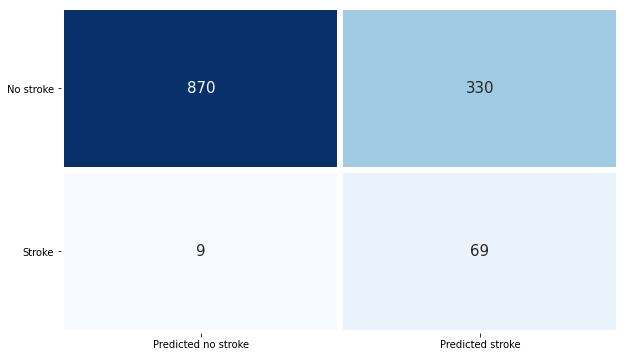

In [200]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_lr, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

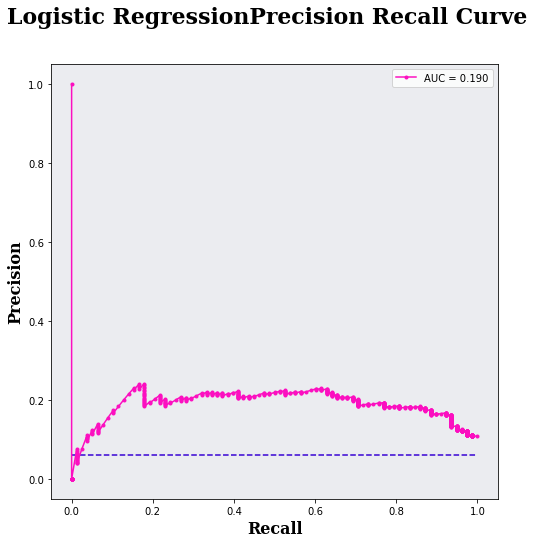

In [201]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Logistic RegressionPrecision Recall Curve', font = 'Serif', weight='bold', color='black', size=22)
ax.set_facecolor('#ebecf0')

ax.plot([0, 1], [no_skill, no_skill], linestyle='--', color=purple_color)
ax.plot(logreg_recall, logreg_precision, marker='.', color=hot_pink_color, label='AUC = %0.3f' % round(logreg_auc, 2))
ax.set_xlabel('Recall', font='Serif', size=16, weight='bold')
ax.set_ylabel('Precision', font='Serif', size=16, weight='bold')
ax.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Importance</h3>

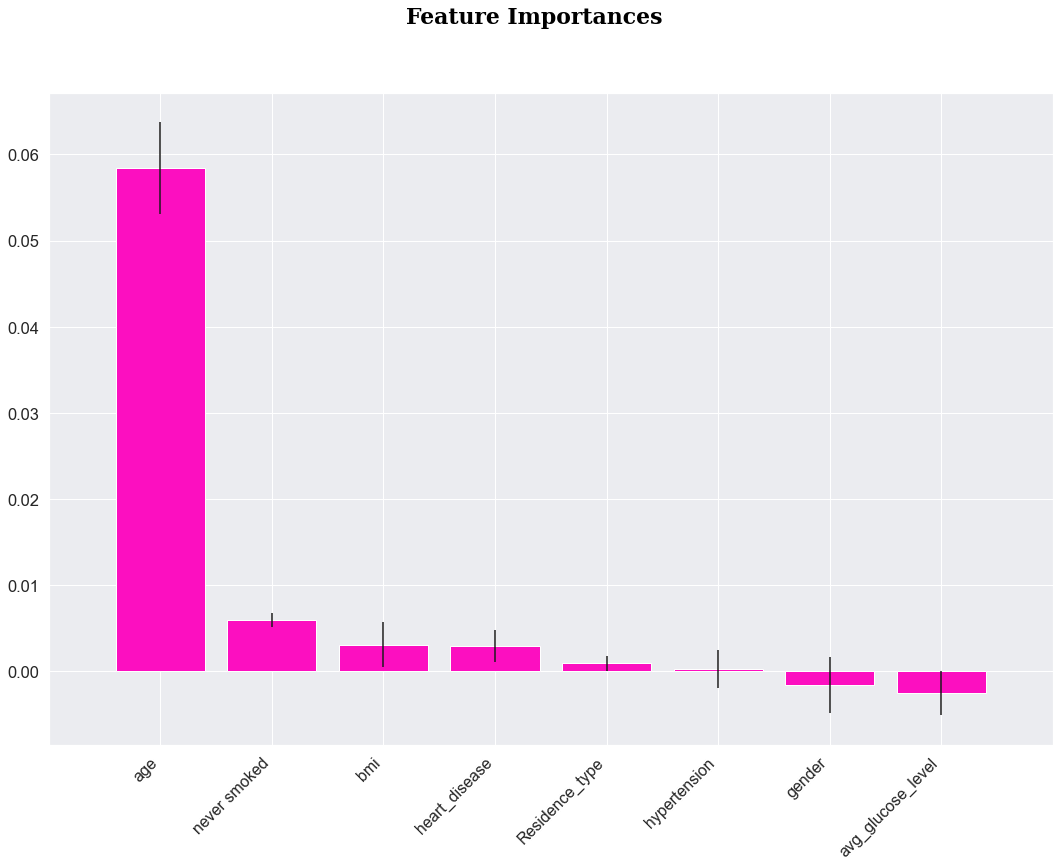

In [223]:
features = X_train.columns
lr_imps = permutation_importance(logreg, X_test, y_test)
lr_importances = lr_imps.importances_mean
lr_std = lr_imps.importances_std
lr_indices = np.argsort(lr_importances)[::-1]

fig, ax = plt.subplots(figsize=(18, 12))
fig.suptitle('Feature Importances', font = 'Serif', weight='bold', color='black', size=22)
ax.set_facecolor('#ebecf0')

ax.bar(range(X_test.shape[1]), lr_importances[lr_indices], color=hot_pink_color, yerr=lr_std[lr_indices], align="center")
ax.set_xticks(range(len(X_test.columns)))
ax.set_xticklabels([features[lr_indices[i]] for i in range(len(X_test.columns))], rotation=45, ha='right', fontsize=16)
ax.set_xlim([-1, X_test.shape[1]])
ax.grid(True)

<a id = '5'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Summary</h1>

Text(0.125, -0.055, "We can see here that our model did very well at predicting stroke. Of the\n78 true stroke victims, our model predicted 69 correctly. Of the 1200 who \ndid not have a stroke, we correcly predicted 870 of them. Unfortunately, it seems the model simply learned that age was\nthe only really important feature. It is surprising to see how useful age alone is in predicting stroke on our dataset. However, \nit would be interesting to see how the model performs without age because we know age isn't the only risk factor for stroke.")

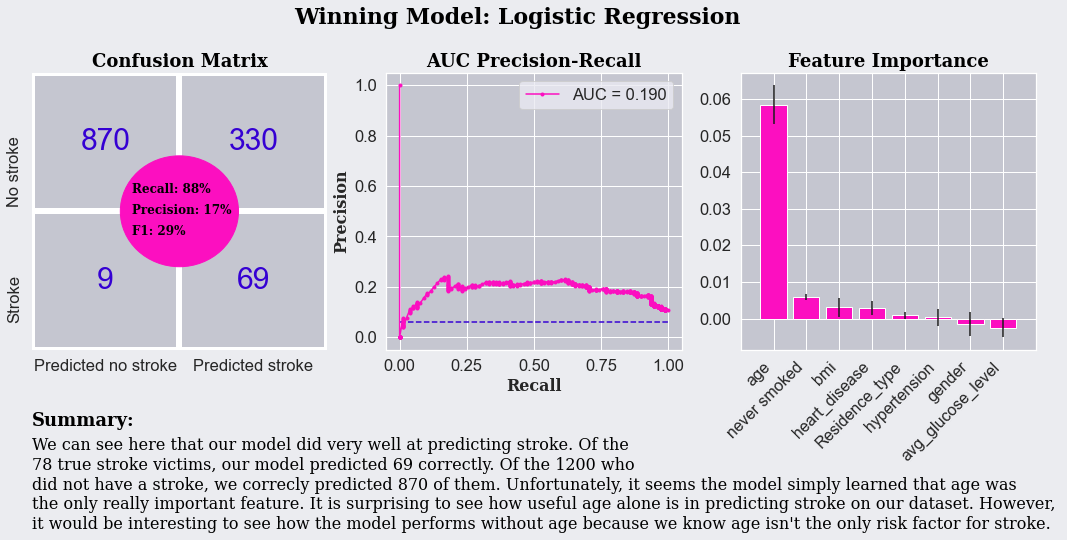

In [227]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
fig.suptitle('Winning Model: Logistic Regression', font = 'Serif', weight='bold', color='black', size=22)
fig.patch.set_facecolor('#ebecf0')
features = X_train.columns

# Logistic Regression CM
ax[0].set_title('Confusion Matrix', titles_font)
ax[0].set_position([0.125, 0.3, 0.22794117647058826, 0.55])
sns.heatmap(ax=ax[0], data=cm_lr, cmap=heatmap_color, annot=True, fmt = 'd',
            linewidths = 5, cbar = False, annot_kws = {'fontsize': 30, 'color': '#3500d3' }, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
circle = matplotlib.patches.Circle((1, 1), radius=.4, color=circle_color)
sns.set(font_scale=1.5)
ax[0].add_patch(circle)
ax[0].text(.68, .87, 'Recall: ' + str(lr_recall) + '%', font_circle)
ax[0].text(.68, 1.02, 'Precision: ' + str(lr_precision) + '%', font_circle)
ax[0].text(.68, 1.17, 'F1: ' + str(lr_f1) + '%', font_circle)

# Logistic Regression ROC/AUC Curve
ax[1].set_title('AUC Precision-Recall', titles_font)
ax[1].set_position([0.3985294117647059, 0.3, 0.2279411764705882, 0.55])
ax[1].set_facecolor(ax_background_color)
ax[1].plot([0, 1], [no_skill, no_skill], linestyle='--', color=purple_color)
ax[1].plot(logreg_recall, logreg_precision, marker='.', color=hot_pink_color, label='AUC = %0.3f' % round(logreg_auc, 2))
ax[1].set_xlabel('Recall', font='Serif', size=16, weight='bold')
ax[1].set_ylabel('Precision', font='Serif', size=16, weight='bold')
ax[1].legend()

#Logistic Regression Feature Importance
ax[2].set_title('Feature Importance', titles_font)
ax[2].set_position([0.6720588235294118, 0.3, 0.2279411764705883, 0.55])
ax[2].bar(range(X_test.shape[1]), lr_importances[lr_indices], color=hot_pink_color, yerr=lr_std[lr_indices], align='center')
ax[2].set_facecolor(ax_background_color)
ax[2].set_xticks(range(len(X_test.columns)))
ax[2].set_xticklabels([features[lr_indices[i]] for i in range(len(X_test.columns))], rotation=45, ha='right', fontsize=16)
ax[2].set_xlim([-1, X_test.shape[1]])
ax[2].grid(True)

fig.text(0.125, 0.15, 'Summary:',
         {'font':'Serif', 'size':18,'weight':'bold' ,'color':'black'})
fig.text(0.125, -0.055, 'We can see here that our model did very well at predicting stroke. Of the\n78 true stroke victims, our model predicted 69 correctly. Of the 1200 who \ndid not have a stroke, we correcly predicted 870 of them. Unfortunately, it seems the model simply learned that age was\nthe only really important feature. It is surprising to see how useful age alone is in predicting stroke on our dataset. However, \nit would be interesting to see how the model performs without age because we know age isn\'t the only risk factor for stroke.',
         {'font':'Serif', 'size':16,'weight':'normal' ,'color':'black'})


<ipython-input-255-1d53dc0dc8d6>:64: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fig.text(0.9,0.72, 'Correct ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':purple_color})
<ipython-input-255-1d53dc0dc8d6>:66: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fig.text(1.04,0.72, 'Incorrect', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':hot_pink_color},alpha = 1)
<ipython-input-255-1d53dc0dc8d6>:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


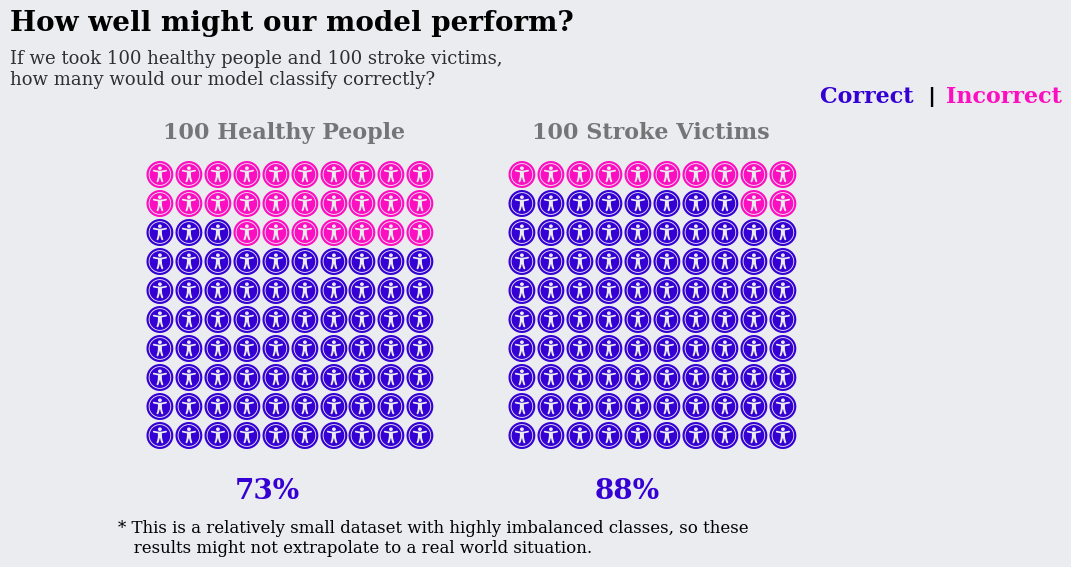

In [255]:
yes = 100
no =  100
false_neg = 100 - round(lr_recall)
false_pos = 100 - round(lr_accuracy)
true_pos = round(lr_recall)
true_neg= round(lr_accuracy)

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (9,9),
                 facecolor = '#ebecf0',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':10,
                           'columns': 10,
                           'values' : [false_pos,true_neg],
                            'colors' : [hot_pink_color,purple_color],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'universal-access',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 10,
                            'columns':10,
                            'values':[false_neg,true_pos],         
                              'colors' : [hot_pink_color,purple_color],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'universal-access',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'How well might our model perform?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.74, 'If we took 100 healthy people and 100 stroke victims,\nhow many would our model classify correctly?', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
#can add text below
fig.text(0.24, 0.22, '', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'})
fig.text(0.65, 0.22, '', {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'})

fig.text(0.25, 0.28, '{}%'.format(true_neg), {'font':'Serif', 'size':20,'weight':'bold' , 'color':purple_color}, alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(true_pos), {'font':'Serif', 'size':20,'weight':'bold', 'color':purple_color}, alpha = 1)
fig.text(0.17, 0.68, '100 Healthy People', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.58, 0.68, "100 Stroke Victims", {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)


fig.text(0.9,0.72, 'Correct ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':purple_color})
fig.text(1.02,0.72, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.72, 'Incorrect', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':hot_pink_color},alpha = 1)

fig.text(0.12, 0.22, '* This is a relatively small dataset with highly imbalanced classes, so these \n   results might not extrapolate to a real world situation.',
         {'font':'Serif', 'size':12,'weight':'normal' ,'color':'black'})
fig.show()